# Input Description

Job  Machine
3    5
Job# Machine#   M1     M2     M3            VG
1    3          1  10  2  30  3  20         1
1    4          1  12  5  13  3  21  4  28  2
1    3          1  21  2  10  3  11         3

3 5
1 3 1 10 2 30 3 20 1
1 4 1 12 5 13 3 21 4 28 2
1 3 1 21 2 10 3 11 3

# Data Parsing

In [174]:
from collections import Counter
import random

def readFile(filePath):
    with open(filePath) as fp:
        line = fp.readline()
        nm = line.strip().split()
        machineCnt = nm[1]
        jobs = []
        machines = []
        processing_time = []
        multi_ops = []
        VG = []
        for i in range(int(nm[0])):
            line = fp.readline()
            cv = list(map(int, line.split()))
            operations = []
            times = []
            j = 0

            # 각 op 별 machine, processing_time 할당
            # operation 개수
            k = cv[j]

            for kj in range(k):
                operation = []
                machine_l = []
                j = j + 1
                end = (cv[j] * 2) + 1
                if kj > 0:
                    operation = []
                for h in range(cv[j]):    
                    j += 1
                    machine = cv[j]
                    j += 1
                    if (j >= len(cv)):
                        continue;
                    # processing_time 할당
                    processing_t = cv[j]
                    machine_l.append(machine)
                    processing_time.append(processing_t)
                    operation.append({'machine': machine, 'processingTime': processing_t})
                operations.append(operation)  
                machines.append(machine_l)
            
            # VG 할당
            vgcnt = 0
            VG_L = [[] for i in range(cv[0])]
            
            for v in range(cv[0]):
                vgcnt = (-v -1)
                VG_L[v].append(int(cv[vgcnt]))

            VG_L.reverse()
            VG.append(VG_L)

            if len(operations) > 1:
                for o in range(len(operations)):
                    if o > 0:
                        # multi_ops.append([operations[o]])
                        jobs[i] += [operations[o]]
                    else:
                        jobs.append([operations[o]])
            else:
                jobs.append(operations)
        # jobs += multi_ops
        
    return jobs, VG, machines, processing_time, {'machineCnt': int(machineCnt), 'jobs': jobs}


In [175]:
jobs, VG, machines, processing_time, jobDicts = readFile("./test_data.txt")

# Population Generation

In [176]:
def re_arrange_jobdict(VG, jobDicts):
    for i in range(len(VG)):
        cnt = 0
        for j in VG[i]:
            if j[0] > 1:
                for k in range(j[0]):
                    if k > 0:
                        jobDicts['jobs'][i].insert(cnt, jobDicts['jobs'][i][cnt])
                        cnt += 1
            cnt += 1
    return jobDicts

In [177]:
jobDicts = re_arrange_jobdict(VG, jobDicts)

In [178]:
from itertools import permutations
def perm_table(VG, machines):
    VG_tables = []
    perm = []
    cnt = 0
    for j in VG:
        if len(j) > 1:
            for k in j:
                perm.append(k[0])
        else:
            perm.append(j[0][0])

    for i in perm:
        per_list = []
        for k in permutations(machines[cnt], i):
            if(len(machines[cnt]) == i) or i==1:
                continue;
            per_list.append(list(k))
        if(len(machines[cnt]) == i) or i==1:
            per_list[:0] = machines[cnt]
        VG_tables.append(per_list)
        cnt += 1
    VG_tables
    return VG_tables


In [179]:
perm_table = perm_table(VG, machines) # [1, 2, 3]

### operation 별로 분리

import random

def generateN(jobDicts, VG):
    if len(VG) > 0:
        N = [[]]
        jobs = jobDicts['jobs']
        i = 0
        for v in VG:
            cnt = 0
            for j in v:
                cnt += 1
                if cnt > 1:
                    N.append([])
                    N[cnt-1].append(i)
                else:
                    N[cnt-1].append(i)
            i += 1
        for i in N:
            random.shuffle(i)
    else:
        N = []

        jobs = jobDicts['jobs']
        i = 0
        for job in jobs:
            for op in job:
                N.append(i)
            i = i+1
        random.shuffle(N)
    return N

def generateM(jobDicts, VG):
    M = [[]]
    if(len(VG) > 0):
        cnt = 0
        for v in VG:
            j = 0
            for k in v:
                if j > 0: 
                    M.append([])
                    cnt += 1
                if(len(perm_table[cnt]) > v[j][0]):
                    random.shuffle(perm_table[cnt])
                    if(type(perm_table[cnt][0]) != int):
                        M[j] = M[j]  + perm_table[cnt][0]
                    else:
                        M[j].append(perm_table[cnt][0])
                else:
                    if(type(perm_table[cnt]) != int):
                        M[j] = M[j]  + perm_table[cnt]
                    else:
                        M[j].append(perm_table[cnt])
                j += 1
            cnt += 1
    else:
        jobs = jobDicts['jobs']
        cnt = 0
        for job in jobs:
            for op in job:
                cnt += 1
                randomMachine = random.randint(0, len(op)-1)
                M.append(randomMachine)
    return M

In [74]:
#VG 별 machine 나누기
def split_by_machine(VG, param, jobDicts):
    (n,m) = param
    job_lists = []
    current = 0
    p = 0
    k = 0
    perm = perm_rearrange(VG);
    if(len(VG) > 0):
        for v in range(len(perm)):
            outer = []
            for j in range(len(perm[v])):
                inner = []
                for i in range(perm[v][j]):
                    if v != k:
                        k += 1
                        p = 0
                        inner = []
                    inner.append(m[v][p])
                    p += 1
                outer.append(inner);
            job_lists.append(outer);
    else:
        current = 0
        for index, job in enumerate(jobDicts['jobs']):
            job_lists.append(m[current:current+len(job)])
            current += len(job)

    return job_lists

In [ ]:
# operation 이 1보다 크면 VG 크기에서 +1 한 값을 낸다.
def generateN(jobDicts, VG):
    if len(VG) > 0:
        N = []
        os = []
        jobs = jobDicts['jobs']
        n_dict = {}
        i = 0
        for v in VG:
            p = len(VG)
            cnt = 0
            for j in v:
                NN = []
                cnt += 1
                if cnt > 1:
                    [NN.append(p) for k in range(j[0])]
                    try:
                        n_dict[cnt] += NN
                    except:
                        n_dict[cnt] = NN
                        p += 1
                    random.shuffle(NN)

                else:
                    # N.append(i)
                    [N.append(i) for k in range(j[0])]
                    n_dict[cnt] = N

            i += 1
        random.shuffle(N)
        for i in n_dict.values():
            os += i
        N = os
    else:
        N = []

        jobs = jobDicts['jobs']
        i = 0
        for job in jobs:
            for op in job:
                N.append(i)
            i = i+1
        random.shuffle(N)
    return N

In [ ]:
N = []
os = []
jobs = jobDicts['jobs']
n_dict = {}
i = 0
jh = 0
for v in VG:
    p = len(VG) - 1
    cnt = 0
    for j in v:
        NN = []
        cnt += 1
        if cnt > 1:
            if jh >= 2:
                pt += 1
            else:
                pt = p + cnt
            [NN.append(pt) for k in range(j[0])]            
            random.shuffle(NN)
            try:
                n_dict[cnt] += NN
            except:
                n_dict[cnt] = NN
            jh += 1
        else:
            [N.append(i) for k in range(j[0])]
            n_dict[cnt] = N
    i += 1
random.shuffle(N)
for i in n_dict.values():
    os += i
N = os
print(n_dict)

In [ ]:
# VG 별 machine 나누기
def split_by_machine(VG, param, jobDicts):
    (n,m) =  param
    job_lists = []
    if(len(VG) > 0):
        cnt = 0
        later_list = []
        for i in range(len(VG)):
            for j in range(len(VG[i])):
                inner = []
                later = []
                h = 0
                for k in range(VG[i][j][0]):
                    if j > 0:
                        later.append(m[cnt])
                        h += 1
                    else:
                        inner.append(m[cnt])
                    cnt += 1

                if len(inner) > 0:
                    job_lists.append(inner)
                if len(later) > 0:
                    later_list.append(later)
        job_lists += later_list
    else:
        current = 0
        for index, job in enumerate(jobDicts['jobs']):
            job_lists.append(m[current:current+len(job)])
            current += len(job)

    return job_lists

### machine 한개의 리스트로 생성

In [180]:
# operation 이 1보다 크면 VG 크기에서 +1 한 값을 낸다.
def generateN(jobDicts, VG):
    if len(VG) > 0:
        N = []
        jobs = jobDicts['jobs']
        n_dict = {}
        os = []
        i = 0
        for v in VG:
            p = len(VG) - 1
            cnt = 0
            for j in v:
                NN = []
                cnt += 1
                if cnt > 1:
                    [NN.append(i) for k in range(j[0])]            
                    try:
                        n_dict[cnt] += NN
                    except:
                        n_dict[cnt] = NN
                    random.shuffle(n_dict[cnt])
                else:
                    [N.append(i) for k in range(j[0])]
                    n_dict[cnt] = N
            i += 1
        random.shuffle(N)
        for i in n_dict.values():
            os += i
        N = os
    else:
        N = []

        jobs = jobDicts['jobs']
        i = 0
        for job in jobs:
            for op in job:
                N.append(i)
            i = i+1
        random.shuffle(N)
    return N

In [181]:
def generateM(jobDicts, VG):
    M = []
    if(len(VG) > 0):
        cnt = 0
        for v in VG:
            j = 0
            for k in v:
                if j > 0: 
                    # M.append([])
                    cnt += 1
                if(len(perm_table[cnt]) > v[j][0]):
                    random.shuffle(perm_table[cnt])
                    if(type(perm_table[cnt][0]) != int):
                        M = M  + perm_table[cnt][0]
                    else:
                        M.append(perm_table[cnt][0])
                else:
                    if(type(perm_table[cnt]) != int):
                        M = M  + perm_table[cnt]
                    else:
                        M.append(perm_table[cnt])
                j += 1
            cnt += 1
    else:
        jobs = jobDicts['jobs']
        cnt = 0
        for job in jobs:
            for op in job:
                cnt += 1
                randomMachine = random.randint(0, len(op)-1)
                M.append(randomMachine)
    return M

In [182]:
def initial_generation(jobDicts, VG):
    pop_gen = []
    for i in range(200):
        NS = generateN(jobDicts, VG)
        MS = generateM(jobDicts, VG)
        pop_gen.append((NS, MS))

    return pop_gen

In [183]:
parameter = initial_generation(jobDicts, VG) # NS MS
parameter

[([2, 4, 1, 0, 3, 4, 1, 2, 2, 5, 5, 5, 1, 3, 3, 1, 1, 1],
  [3, 3, 1, 1, 1, 2, 3, 1, 2, 3, 1, 4, 2, 4, 1, 1, 2, 3]),
 ([5, 2, 2, 2, 5, 1, 5, 3, 1, 4, 0, 4, 1, 3, 3, 1, 1, 1],
  [1, 4, 5, 3, 1, 2, 3, 1, 2, 3, 3, 4, 2, 4, 3, 1, 2, 3]),
 ([5, 2, 4, 1, 5, 4, 1, 5, 3, 0, 2, 2, 3, 3, 1, 1, 1, 1],
  [2, 1, 4, 1, 1, 2, 3, 1, 2, 3, 3, 4, 2, 1, 4, 1, 2, 3]),
 ([1, 2, 5, 4, 2, 1, 5, 2, 3, 0, 5, 4, 3, 3, 1, 1, 1, 1],
  [3, 3, 1, 3, 1, 2, 3, 1, 2, 3, 2, 4, 2, 4, 1, 1, 2, 3]),
 ([5, 4, 3, 2, 1, 4, 2, 1, 5, 5, 2, 0, 1, 3, 3, 1, 1, 1],
  [3, 3, 5, 1, 1, 2, 3, 1, 2, 3, 1, 4, 2, 5, 4, 1, 2, 3]),
 ([1, 5, 4, 1, 2, 4, 2, 0, 5, 2, 3, 5, 3, 3, 1, 1, 1, 1],
  [3, 3, 5, 3, 1, 2, 3, 1, 2, 3, 3, 4, 2, 4, 5, 1, 2, 3]),
 ([5, 3, 2, 1, 5, 4, 4, 5, 0, 2, 1, 2, 3, 3, 1, 1, 1, 1],
  [2, 3, 1, 2, 1, 2, 3, 1, 2, 3, 1, 4, 2, 1, 3, 1, 2, 3]),
 ([4, 3, 5, 5, 4, 2, 2, 1, 1, 2, 5, 0, 3, 3, 1, 1, 1, 1],
  [2, 3, 5, 3, 1, 2, 3, 1, 2, 3, 1, 4, 2, 5, 4, 1, 2, 3]),
 ([3, 0, 1, 4, 2, 5, 1, 4, 5, 2, 5, 2, 1, 3, 3, 1, 1, 1],
  [3, 

# Calculate Makespan

In [184]:
# VG 별 machine 나누기
def split_by_machine(VG, param, jobDicts):
    (n,m) =  param
    job_lists = []
    if(len(VG) > 0):
        cnt = 0
        later_list = []
        for i in range(len(VG)):
            for j in range(len(VG[i])):
                inner = []
                later = []
                h = 0
                for k in range(VG[i][j][0]):
                    if j > 0:
                        later.append(m[cnt])
                        h += 1
                    else:
                        inner.append(m[cnt])
                    cnt += 1

                if len(inner) > 0:
                    job_lists.append(inner)
                if len(later) > 0:
                    job_lists[i] += later
        job_lists += later_list
    else:
        current = 0
        for index, job in enumerate(jobDicts['jobs']):
            job_lists.append(m[current:current+len(job)])
            current += len(job)

    return job_lists

In [185]:
def is_free(tab, start, duration):
    for k in range(start, start+duration):
        if not tab[k]:
            return False
    return True

def find_first_proc_time(start_ctr, duration, machine_jobs):
    max_duration_list = []
    max_duration = start_ctr + duration

    if machine_jobs:
        for job in machine_jobs:
            max_duration_list.append(job[3] + job[1]) 

        max_duration = max(max(max_duration_list), start_ctr) + duration

    machine_used = [True] * max_duration

    for job in machine_jobs:
        start = job[3]
        long = job[1]
        for k in range(start, start + long):
            machine_used[k] = False

    for k in range(start_ctr, len(machine_used)):
        if is_free(machine_used, k, duration):
            return k

In [186]:
def calculateMakespan(cpl, jobDicts):
    times_taken = getMakespans(cpl, jobDicts)
    
    max_per_machine = []
    for machine in times_taken:
        max_d = 0
        for job in machine:
            end = job[2]
            if end > max_d:
                max_d = end
        max_per_machine.append(max_d)
    return max(max_per_machine)

In [187]:
def VG_transform(VG):
    VG_t = []
    for i in range(len(VG)):
        cnt = 0
        inner = []
        for j in range(len(VG[i])):
            inner += [cnt for k in range(VG[i][j][0])]
            cnt += 1
        VG_t.append(inner)
    return VG_t

In [188]:
vg_t

[[0], [0, 0, 1, 2, 2, 2], [0, 0, 0], [0, 1, 1], [0, 0], [0, 0, 0]]

In [189]:
def getMakespans(cpl, jobDicts):

    o = jobDicts['jobs']
    (n, m) = cpl
    max_machine = 1
    for i in machines:
        if max(i) > max_machine:
            max_machine = max(i)

    # 작업 별 사용하는 machine 분류
    m_splits = split_by_machine(VG, (n, m), jobDicts)
    # 각 작업 순서 기록
    outer_shell = [0] * len(m_splits)
    # 각 작업 별 시작 시간 기록
    str_time_task = [0] * len(m_splits)
    # 각 기계별 작업의 processing time 기록
    ops = [[] for i in range(max_machine)]

    vg_t = VG_transform(VG)
    vt = [0] * len(m_splits)
    for i in n:
        idx_m = m_splits[i][outer_shell[i]]
        # machine과 processing time 할당
        if (len(VG) > 0):
            machine = [o[i][outer_shell[i]][k]['machine'] for k in range(len(o[i][outer_shell[i]])) if o[i][outer_shell[i]][k]['machine']==idx_m][0]
            proc_t = [o[i][outer_shell[i]][k]['processingTime'] for k in range(len(o[i][outer_shell[i]])) if o[i][outer_shell[i]][k]['machine']==idx_m][0]
        else:
            machine = o[i][outer_shell[i]][idx_m]['machine']
            proc_t = o[i][outer_shell[i]][idx_m]['processingTime']

        start_t = str_time_task[i]

        start = find_first_proc_time(start_t, proc_t, ops[machine-1])
        tag = "{}-{}".format(i, vg_t[i][outer_shell[i]] + 1) 

        counter = Counter(vg_t[i])

        if(len(ops[machine-1]) > 0):
            if (vt[i] != vg_t[i][outer_shell[i]]):
                if counter[vg_t[i][outer_shell[i]]]-1 == 0:
                    str_time_task[i] = (start + proc_t)
                else:
                    str_time_task[i] = start_t# (start + proc_t)
                vt[i] = vg_t[i][outer_shell[i]]
            else:
                if (counter[outer_shell[i]]-1) == outer_shell[i]:
                    str_time_task[i] = (start + proc_t)
                else:
                    str_time_task[i] = start_t # (start + proc_t)
        else:
            start = 0
            str_time_task[i] = start_t # (start + proc_t)

        ops[machine-1].append((tag, proc_t, start_t, start))

        outer_shell[i] += 1
        # str_time_task[i] = (start + proc_t)


    data = []

    for idx, machine in enumerate(ops):
        operations = []
        for operation in machine:
            operations.append((operation[0], operation[3], operation[3] + operation[1]))
        data.append(operations)
    
    return data

In [162]:
data = []

for idx, machine in enumerate(ops):
    operations = []
    for operation in machine:
        operations.append((operation[0], operation[3], operation[3] + operation[1]))
    data.append(operations)
    
print(data)


[[('5-1', 0, 21), ('2-1', 21, 42), ('0-1', 42, 52), ('3-1', 52, 62), ('1-3', 84, 108)], [('5-1', 0, 10), ('2-1', 10, 20), ('3-2', 62, 107), ('1-3', 107, 133)], [('1-1', 0, 21), ('4-1', 21, 42), ('5-1', 42, 53), ('2-1', 53, 64), ('1-2', 64, 84), ('1-3', 84, 102)], [('4-1', 0, 28), ('1-1', 28, 56), ('3-2', 62, 98)], []]


[[('5-1', 0, 21),
  ('2-1', 0, 21),
  ('0-1', 0, 10),
  ('3-1', 0, 10),
  ('1-3', 0, 24)],
 [('5-1', 0, 10), ('2-1', 0, 10), ('3-2', 0, 45), ('1-3', 0, 26)],
 [('1-1', 0, 21),
  ('4-1', 0, 21),
  ('5-1', 0, 11),
  ('2-1', 0, 11),
  ('1-2', 0, 20),
  ('1-3', 0, 18)],
 [('4-1', 0, 28), ('1-1', 0, 28), ('3-2', 0, 36)],
 []]

In [169]:

import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib import colors as mcolors

colors = []

for name, hex in mcolors.cnames.items():
    colors.append(name)
    
nb_row = len(data.keys())

pos = np.arange(0.5, nb_row * 0.5 + 0.5, 0.5)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)

index = 0
max_len = []

for machine, operations in sorted(data.items()):
    for op in operations:
        max_len.append(op[1])
        c = random.choice(colors)
        rect = ax.barh((index * 0.5) + 0.5, op[1] - op[0], left=op[0], height=0.3, align='center',
                       edgecolor=c, color=c, alpha=0.8)

        # adding label
        width = int(rect[0].get_width())
        Str = "OP_{}".format(op[2])
        xloc = op[0] + 0.50 * width
        clr = 'black'
        align = 'center'

        yloc = rect[0].get_y() + rect[0].get_height() / 2.0
        ax.text(xloc, yloc, Str, horizontalalignment=align,
                        verticalalignment='center', color=clr, weight='bold',
                        clip_on=True)
    index += 1

ax.set_ylim(ymin=-0.1, ymax=nb_row * 0.5 + 0.5)
ax.grid(color='gray', linestyle=':')
ax.set_xlim(0, max(10, max(max_len)))

labelsx = ax.get_xticklabels()
plt.setp(labelsx, rotation=0, fontsize=10)

locsy, labelsy = plt.yticks(pos, data.keys())
plt.setp(labelsy, fontsize=14)

font = font_manager.FontProperties(size='small')
ax.legend(loc=1, prop=font)

ax.invert_yaxis()

plt.title("Flexible Job Shop Solution")
plt.savefig('gantt.svg')
plt.show()

AttributeError: 'list' object has no attribute 'keys'

In [388]:
# o = jobDicts['jobs']
# (n, m) = ([1, 5, 5, 2, 4, 5, 2, 0, 4, 2, 1, 3, 3, 1, 3, 1, 1, 1],
#           [1, 3, 4, 3, 1, 2, 3, 1, 2, 3, 1, 4, 2, 3, 4, 1, 2, 3])
# def getMakespans(cpl, jobDicts):
o = jobDicts['jobs']
(n, m) = ([1, 5, 5, 2, 4, 5, 2, 0, 4, 2, 1, 3, 3, 1, 3, 1, 1, 1],
          [1, 3, 4, 3, 1, 2, 3, 1, 2, 3, 1, 4, 2, 3, 4, 1, 2, 3])
vg_t = VG_transform(VG)
vt = 0
max_machine = 1
for i in machines:
    if max(i) > max_machine:
        max_machine = max(i)

ops = [[] for i in range(max_machine)]
time_taken = [[] for i in range(max_machine)]
m_splits = split_by_machine(VG, (n, m), jobDicts)
outer_shell = [0] * len(m_splits)
time_outer_shell = [0] * len(m_splits)
end_times = [0] * len(m_splits)
for i in n:
    idx_m = m_splits[i][outer_shell[i]]
    if (len(VG) > 0):
        machine = [o[i][outer_shell[i]][k]['machine'] for k in range(len(o[i][outer_shell[i]])) if o[i][outer_shell[i]][k]['machine']==idx_m][0]
        proc_t = [o[i][outer_shell[i]][k]['processingTime'] for k in range(len(o[i][outer_shell[i]])) if o[i][outer_shell[i]][k]['machine']==idx_m][0]
    else:
        machine = o[i][outer_shell[i]][idx_m]['machine']
        proc_t = o[i][outer_shell[i]][idx_m]['processingTime']

    start_t = find_first_proc_time(time_outer_shell[i], proc_t, ops[machine -1])
    
    # tag = "{}-{}".format(i, outer_shell[i]+1)
    tag = "{}-{}".format(i, VG_t[i][outer_shell[i]] + 1) 

    if(len(time_taken[machine-1])>0):
        lng = len(time_taken[machine-1])-1
        time = time_taken[machine-1][lng] + proc_t
        # time_taken[machine-1].append(time)
        
        if VG_t[i][outer_shell[i]] != 0:
            if end_times[i] > time_taken[machine-1][lng]:
                time_taken[machine-1].append(end_times[i])
                ops[machine-1].append((tag, time_taken[machine-1][lng], time))
                print(i, end_times[i], time_taken[machine-1], ops[machine-1])
            else:
                time_taken[machine-1].append(time)
                ops[machine-1].append((tag, time_taken[machine-1][lng], time))
            if vt != VG_t[i][outer_shell[i]]:
                vt = VG_t[i][outer_shell[i]]
                end_times[i] = time
        else:
            time_taken[machine-1].append(time)
            ops[machine-1].append((tag, time_taken[machine-1][lng], time))
            end_times[i] = time
        # ops[machine-1].append((tag, end_times[i], time))
        
#         if i == 3:
#             print(tag, time_taken[machine-1][lng], start_t, proc_t, time, end_times)
    else:
        time_taken[machine-1].append((start_t + proc_t))
        ops[machine-1].append((tag, start_t, (start_t + proc_t)))
        end_times[i] = (start_t + proc_t)
    outer_shell[i] += 1
print(ops)
    #return ops;


3 62 [28, 56, 62] [('4-1', 0, 28), ('1-1', 28, 56), ('3-2', 56, 92)]
3 92 [10, 20, 92] [('5-1', 0, 10), ('2-1', 10, 20), ('3-2', 20, 65)]
1 86 [21, 42, 53, 64, 84, 86] [('1-1', 0, 21), ('4-1', 21, 42), ('5-1', 42, 53), ('2-1', 53, 64), ('1-2', 64, 84), ('1-3', 84, 102)]
[[('5-1', 0, 21), ('2-1', 21, 42), ('0-1', 42, 52), ('3-1', 52, 62), ('1-3', 62, 86)], [('5-1', 0, 10), ('2-1', 10, 20), ('3-2', 20, 65), ('1-3', 92, 118)], [('1-1', 0, 21), ('4-1', 21, 42), ('5-1', 42, 53), ('2-1', 53, 64), ('1-2', 64, 84), ('1-3', 84, 102)], [('4-1', 0, 28), ('1-1', 28, 56), ('3-2', 56, 92)], []]


In [190]:
sortedPop = sorted(parameter, key=lambda cpl: calculateMakespan(cpl, jobDicts))

# minimum makespan population
# sortedPop[0][0], sortedPop[0][1]

# Draw Gantt Chart

In [191]:
gantt = getMakespans((sortedPop[0][0], sortedPop[0][1]), jobDicts)
gantt

[[('5-1', 0, 21),
  ('2-1', 21, 42),
  ('4-1', 42, 54),
  ('1-2', 54, 64),
  ('1-3', 64, 88)],
 [('5-1', 0, 10), ('2-1', 10, 20), ('3-2', 20, 65), ('1-3', 65, 91)],
 [('3-1', 0, 20),
  ('2-1', 20, 31),
  ('5-1', 31, 42),
  ('0-1', 42, 62),
  ('1-3', 64, 82)],
 [('1-1', 0, 28), ('4-1', 28, 56), ('3-2', 56, 92)],
 [('1-1', 0, 13)]]

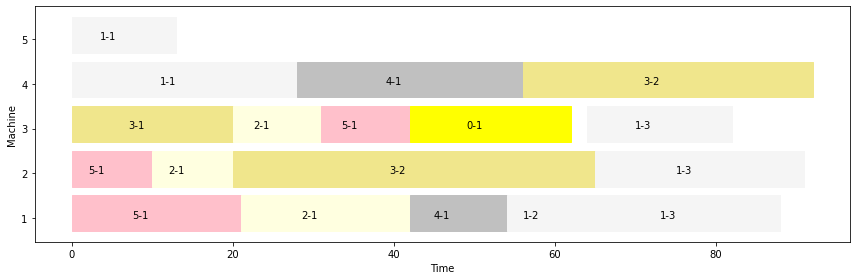

In [192]:
# gantt
# m_cnt = jobDicts['machineCnt']
import datetime
import matplotlib.pyplot as plt
colorbox = ['yellow', 'whitesmoke', 'lightyellow',
            'khaki', 'silver', 'pink', 'lightgreen', 'orange', 'grey', '#8ca8df', 'brown']

for i in range(100):
    colorArr = ['1', '2', '3', '4', '5', '6', '7',
                '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0, 14)]
    colorbox.append("#" + color)

zzl = plt.figure(figsize=(12, 4))

mcnt = 0
for i in gantt:
    for j in i:
        mText = mcnt + 1.5
        mPoint1 = j[1]
        mPoint2 = j[2]
        Word = j[0]
        x1 = mPoint1
        y1 = mText - 0.8
        x2 = mPoint2
        y2 = mText - 0.8
        x3 = mPoint2
        y3 = mText
        x4 = mPoint1
        y4 = mText
        
        color_per_job = int(j[0][:j[0].find('-')])
        plt.fill([x1, x2, x3, x4], [y1, y2, y3, y4],
                 color=colorbox[color_per_job])
        plt.text(0.5 * mPoint1 + 0.5 * mPoint2 - 3, mText - 0.5, Word)
        
    mcnt += 1
        
plt.xlabel('Time')
plt.ylabel('Machine')
plt.tight_layout()
plt.show()